In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('homeprices_banglore.csv')
df.sample(5)

,area,bedrooms,price
19,800,1,32.0
4,1200,2,51.0
18,2770,3,102.0
8,1310,3,50.0
1,2600,4,120.0


In [5]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scale_x = sx.fit_transform(df.drop('price', axis='columns'))
scale_y = sy.fit_transform(df['price'].values.reshape(df.shape[0], 1))

In [10]:
shapeX = scale_x.shape[1]
shapeX

2

In [11]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    number_of_features = X.shape[1]
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        y_predicted = np.dot(w, X.T) + b
        
        w_grad = -(2/total_samples)*(X.T.dot(y_true - y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true - y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(y_true - y_predicted))
        
        if i % 10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
    
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scale_x, scale_y.flatten(), 500)
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

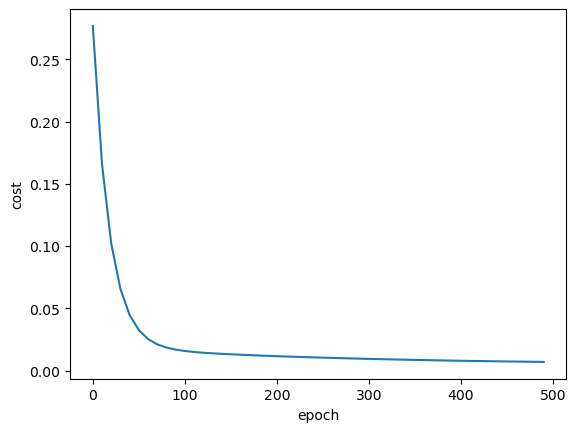

In [12]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [13]:
def predict(area,bedrooms,w,b):
    scaled_X = sx.transform([[area, bedrooms]])[0]
    # here w1 = w[0] , w2 = w[1], w3 = w[2] and bias is b
    # equation for price is w1*area + w2*bedrooms + w3*age + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    # scaled_X[2] is age
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600,4,w,b)

c:\Users\sakif\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596

In [14]:
# we will use random libary to pick random training sample.
import random
random.randint(0,6) # randit gives random number between two numbers specified in the argument

6

In [18]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):    
        random_index = random.randint(0,total_samples-1) # random index from total samples
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w, sample_x.T) + b
    
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.square(sample_y-y_predicted)
        
        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scale_x,scale_y.reshape(scale_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

(array([0.70679939, 0.67408208]), -0.23140490267574304, 0.0024087614979897646)

In [19]:
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

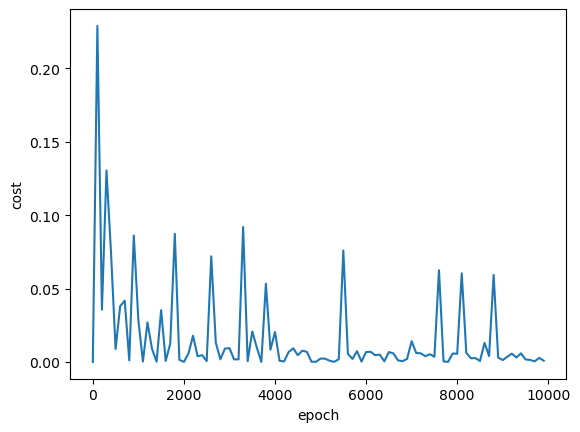

In [20]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)
plt.show()